<a href="https://colab.research.google.com/github/jeon-chanhee/DataScience/blob/main/unit09_%EC%9A%B0%EB%A6%AC_%EB%8F%99%EB%84%A4_%EC%9D%B8%EA%B5%AC_%EA%B5%AC%EC%A1%B0%EB%A5%BC_%ED%8C%8C%EC%9D%B4_%EC%B0%A8%ED%8A%B8%EB%A1%9C_%EB%82%98%ED%83%80%EB%82%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

한글 깨짐 방지

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


제주특별자치도의 성별 분포를 항아리 모양 그래프로 표현

찾고 싶은 지역의 이름을 알려주세요제주특별자치도


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


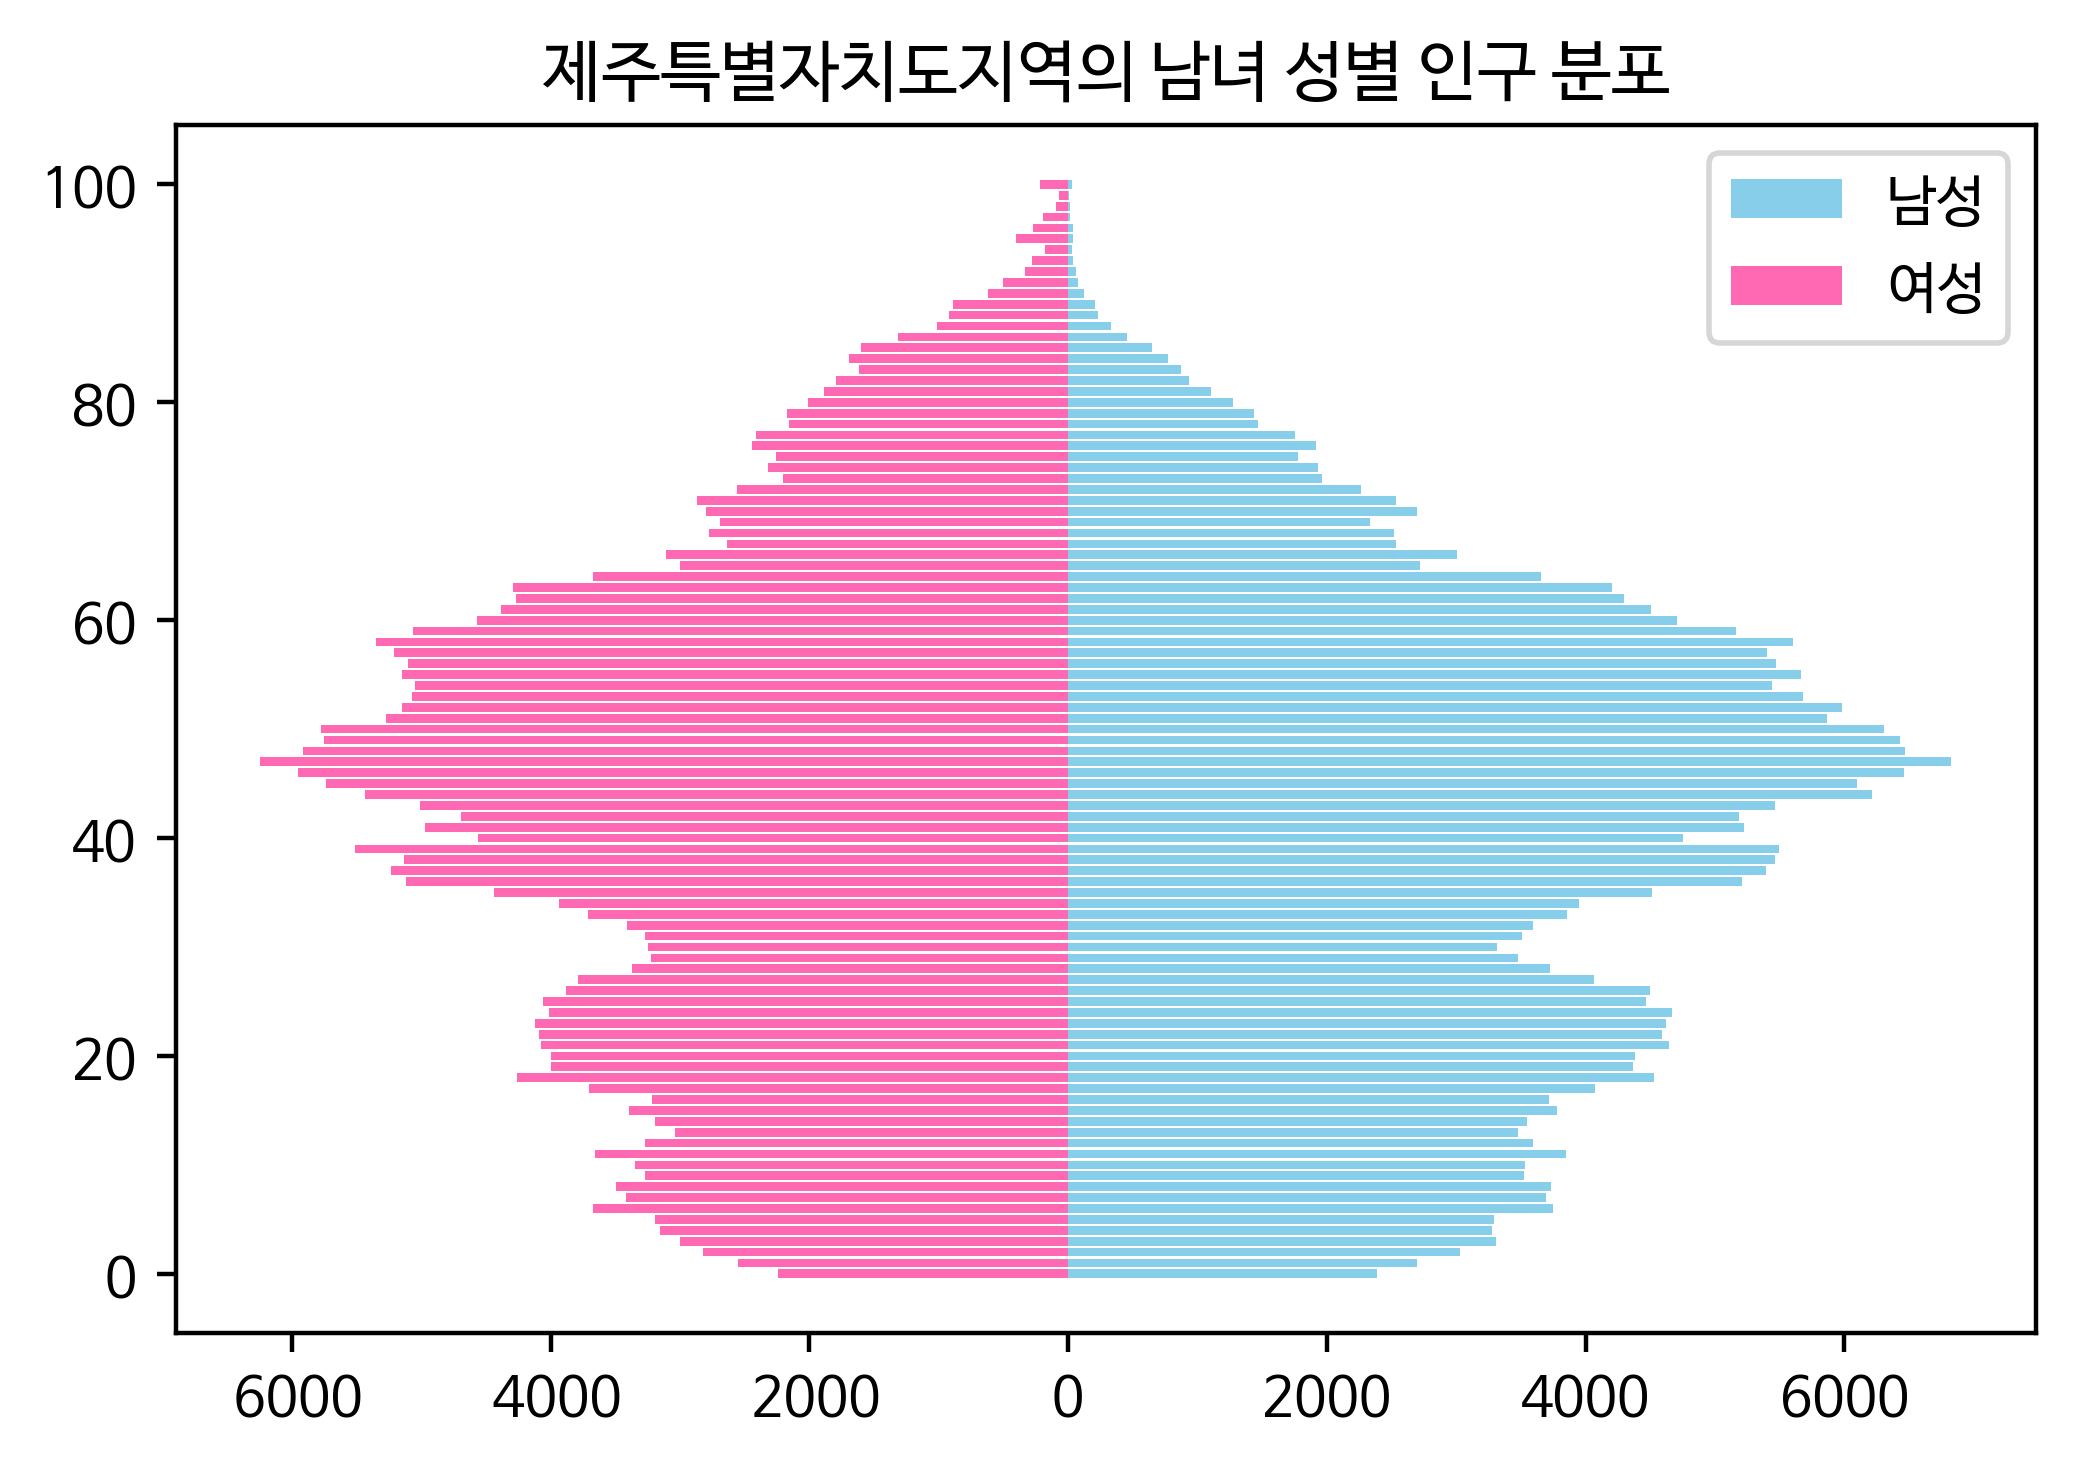

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv',encoding='cp949')
data = csv.reader(f)

m = []
f = []

name = input('찾고 싶은 지역의 이름을 알려주세요')

for row in data:
  if name in row[0]:
    for i in range(0,101):
      m.append(int(row[i+3].replace(',','')))
      f.append(-int(row[-(i+1)].replace(',','')))
    break   # 뒤에 있는 같은 이름의 데이터가 있더라도 1개만 추가하고 for문 탈출할거야! 

f.reverse()

plt.figure(dpi=200)
plt.rc('font', family = 'NanumBarunGothic')
plt.title(name + '지역의 남녀 성별 인구 분포')
plt.barh(range(101), m, color = 'skyblue',label = '남성')
plt.barh(range(101), f, color = 'hotpink', label = '여성')
plt.legend()
plt.show()

In [ ]:
print(len(m),len(f))

101 101


항아리 모양의 그래프는 연령대별 인구 차이 확인 가능 <br>
but 어떤 성별이 많은지에 대한 정보 한눈에 파악하기 어려움 -> 파이차트 Pie


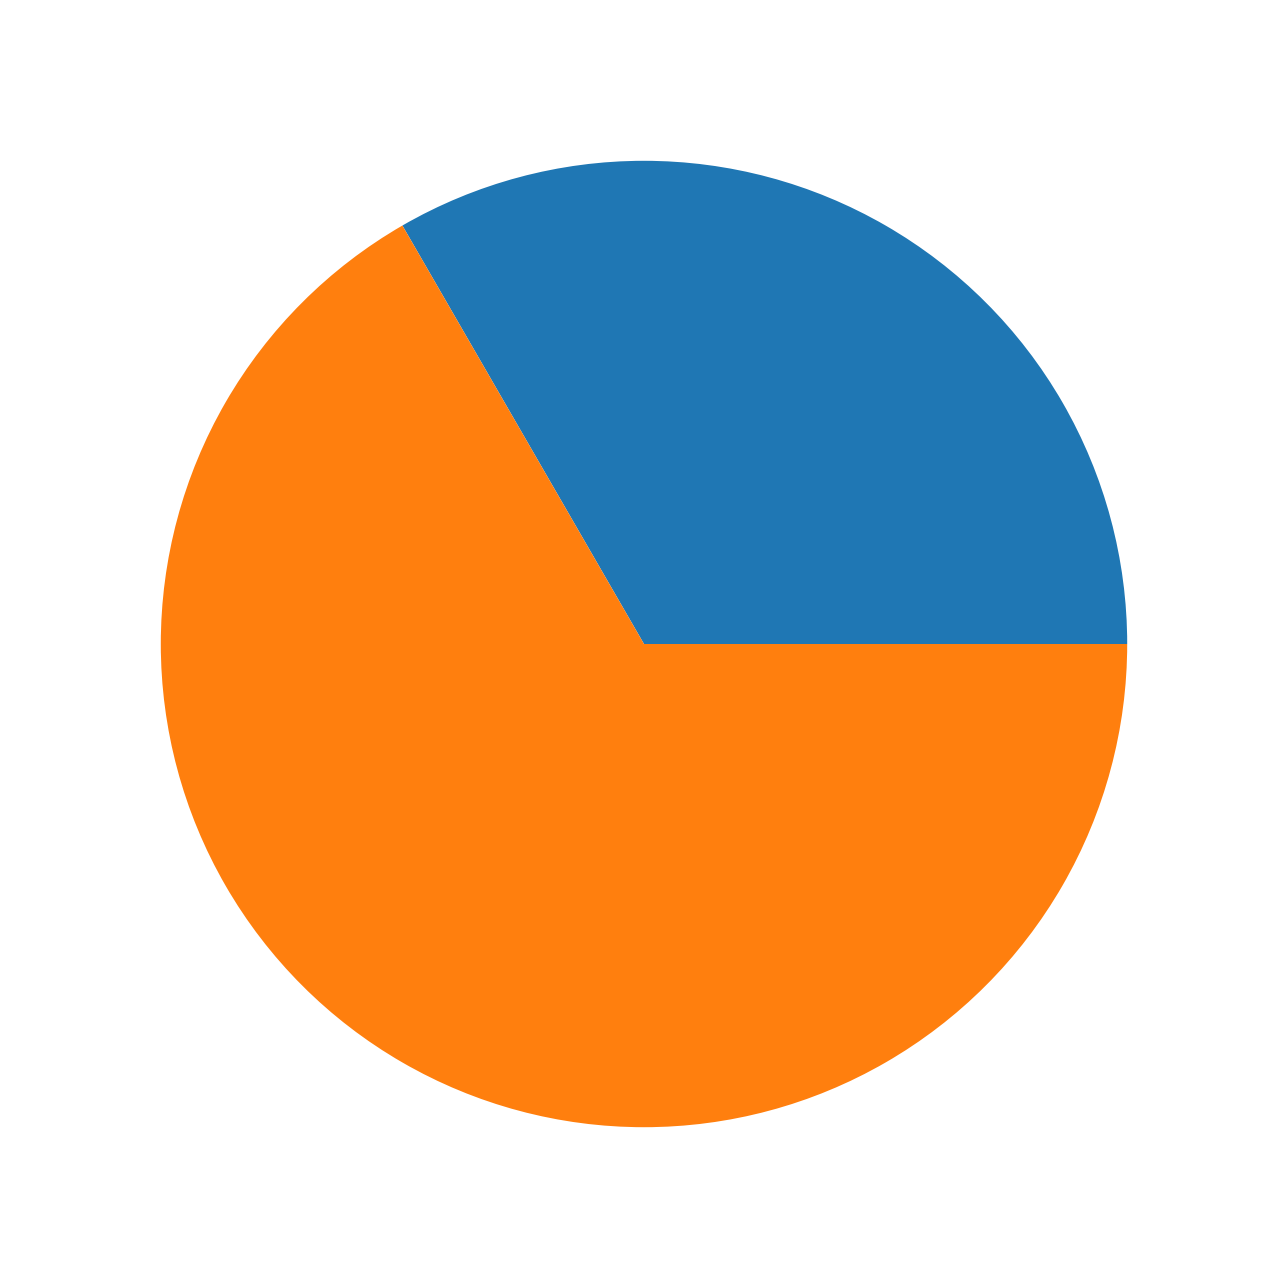

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

plt.pie([10,20]) # pie(x) x가 가지고 있는 값을 비율로 표시
plt.show()

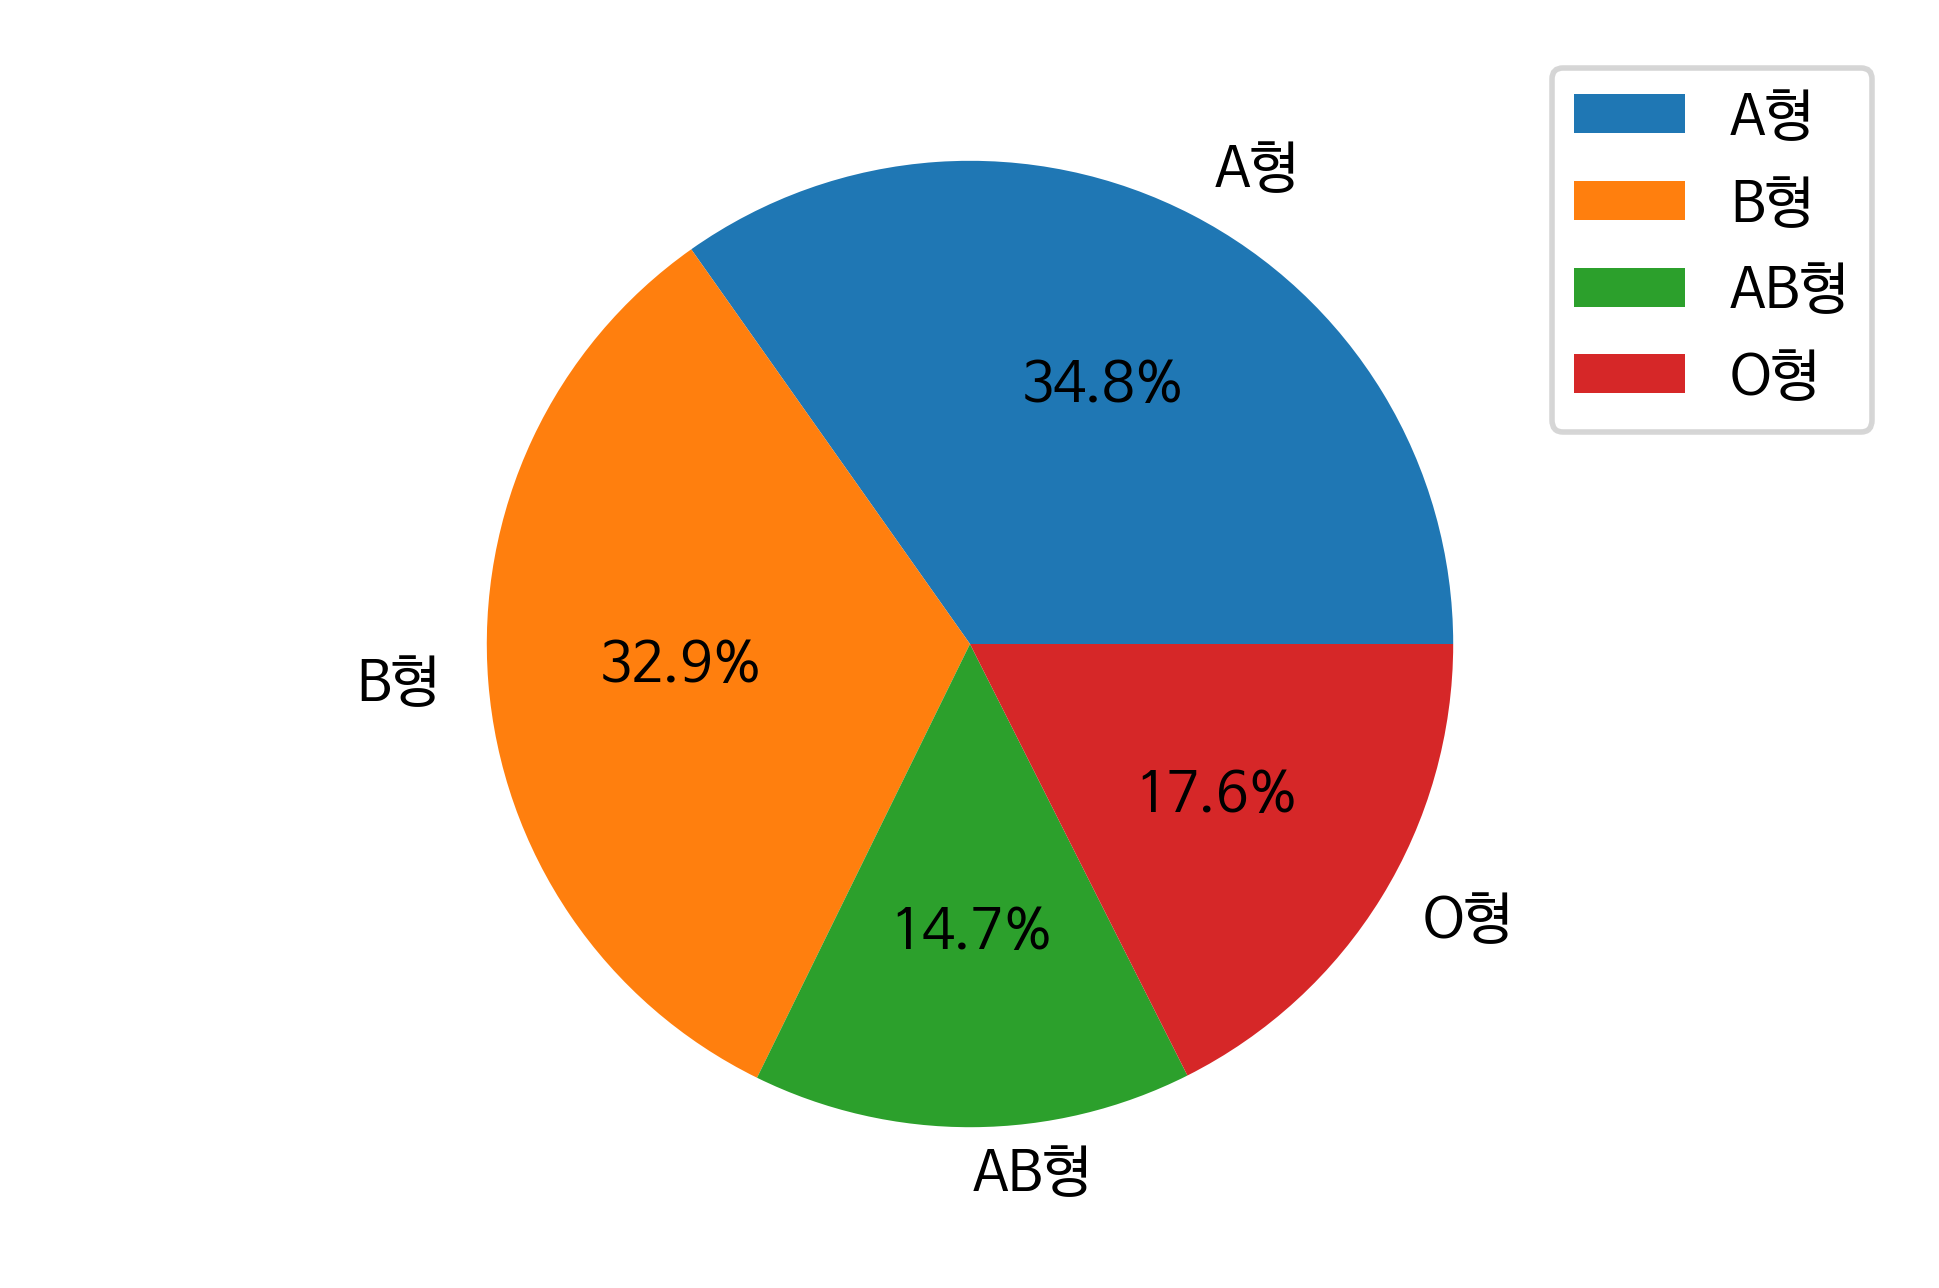

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
plt.axis('equal')   # label 안 겹치게하는 메소드
plt.pie(size,labels=label,autopct='%.1f%%') # autopct %.1f 1자리까지 표시해라 , labels 는 label의 복수형
plt.legend()
plt.show()

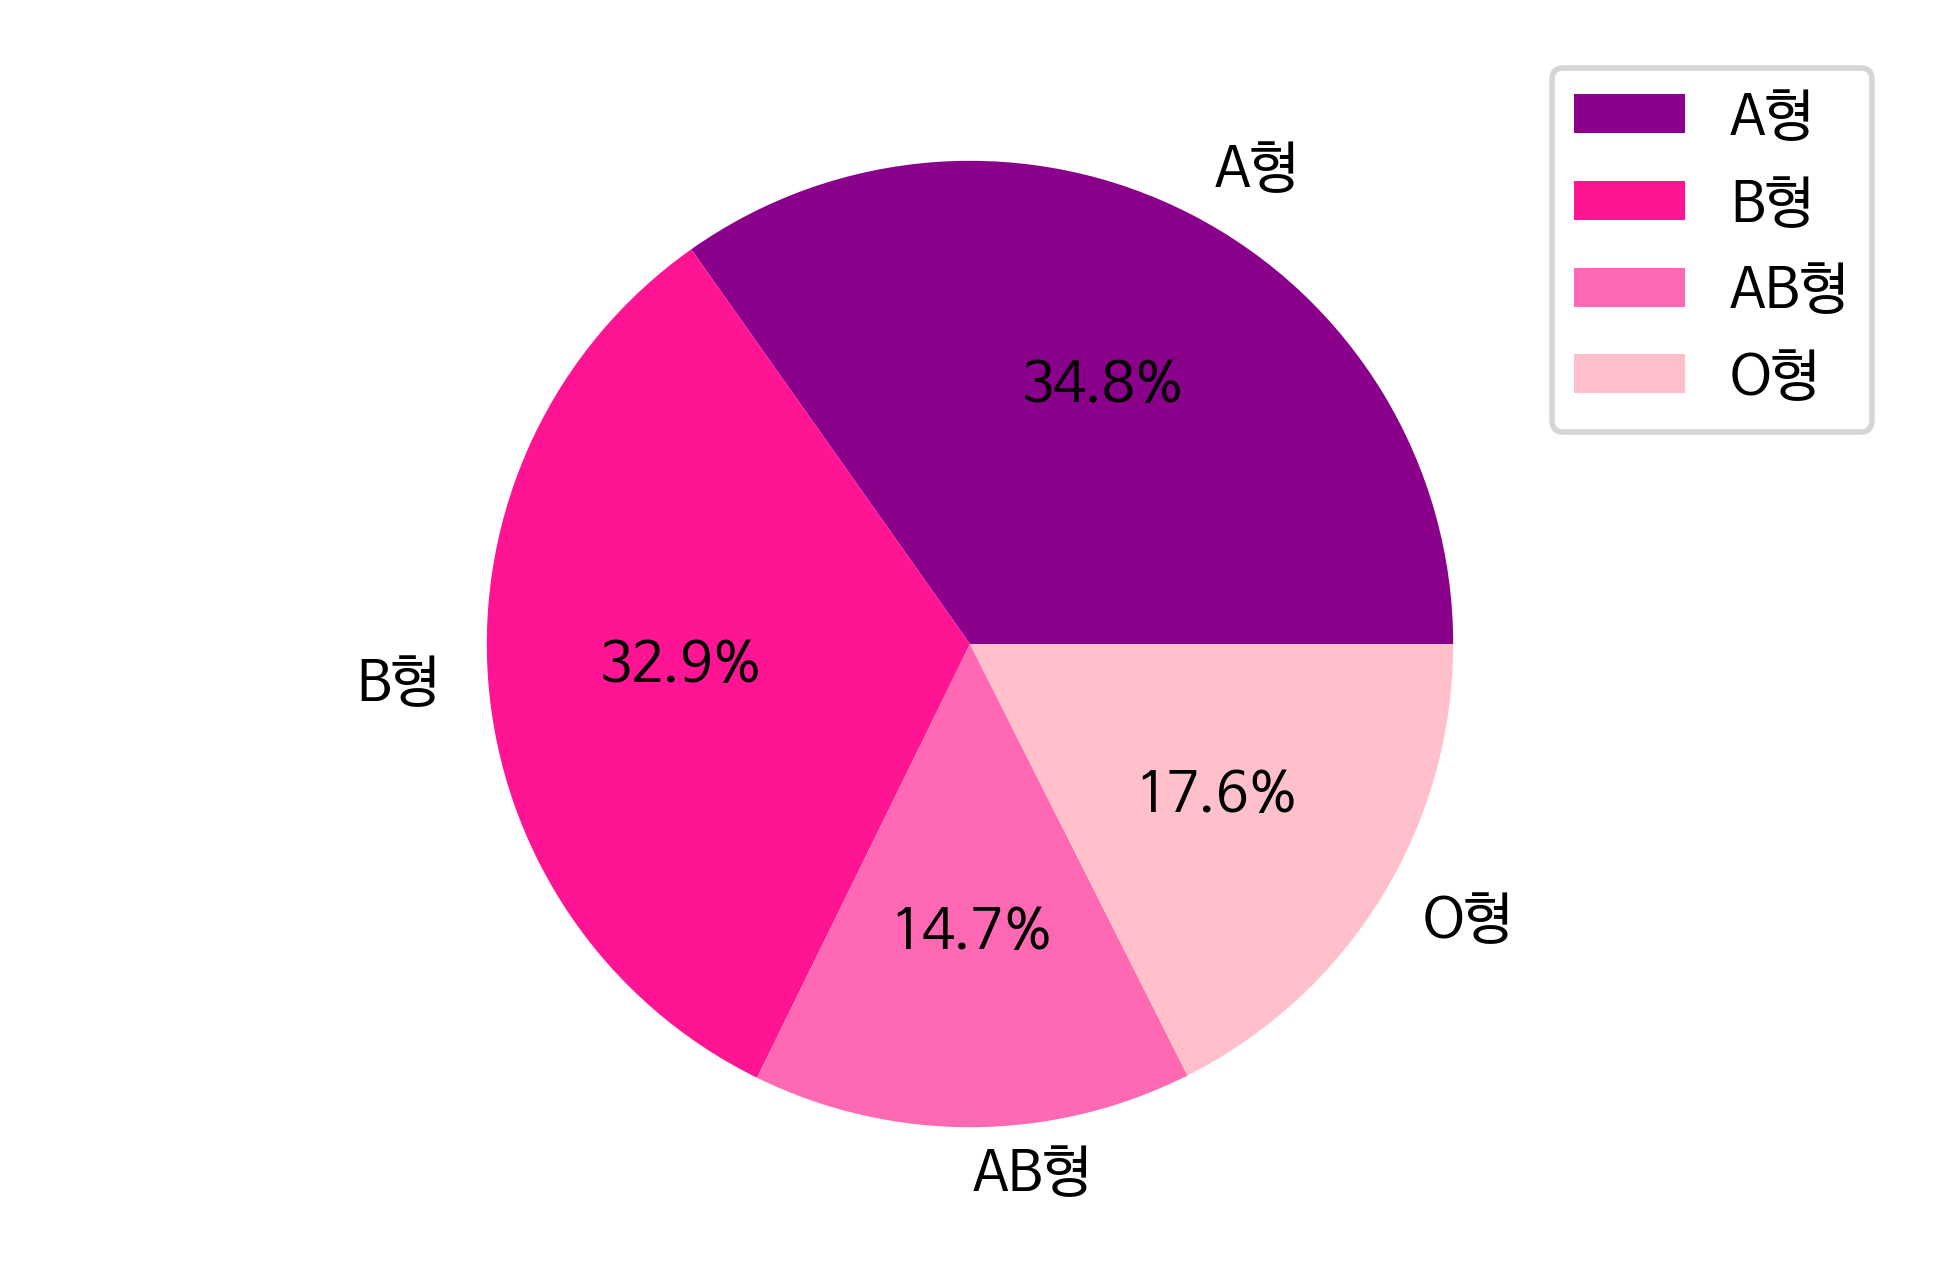

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']  # 표현하는 데이터가 여러가지이기 때문에 리스트형으로 만듬

plt.axis('equal')   # label 안 겹치게하는 메소드
plt.pie(size,labels=label,autopct='%.1f%%',colors=color) # autopct %.1f 1자리까지 표시해라 , labels 는 label의 복수형
plt.legend()
plt.show()

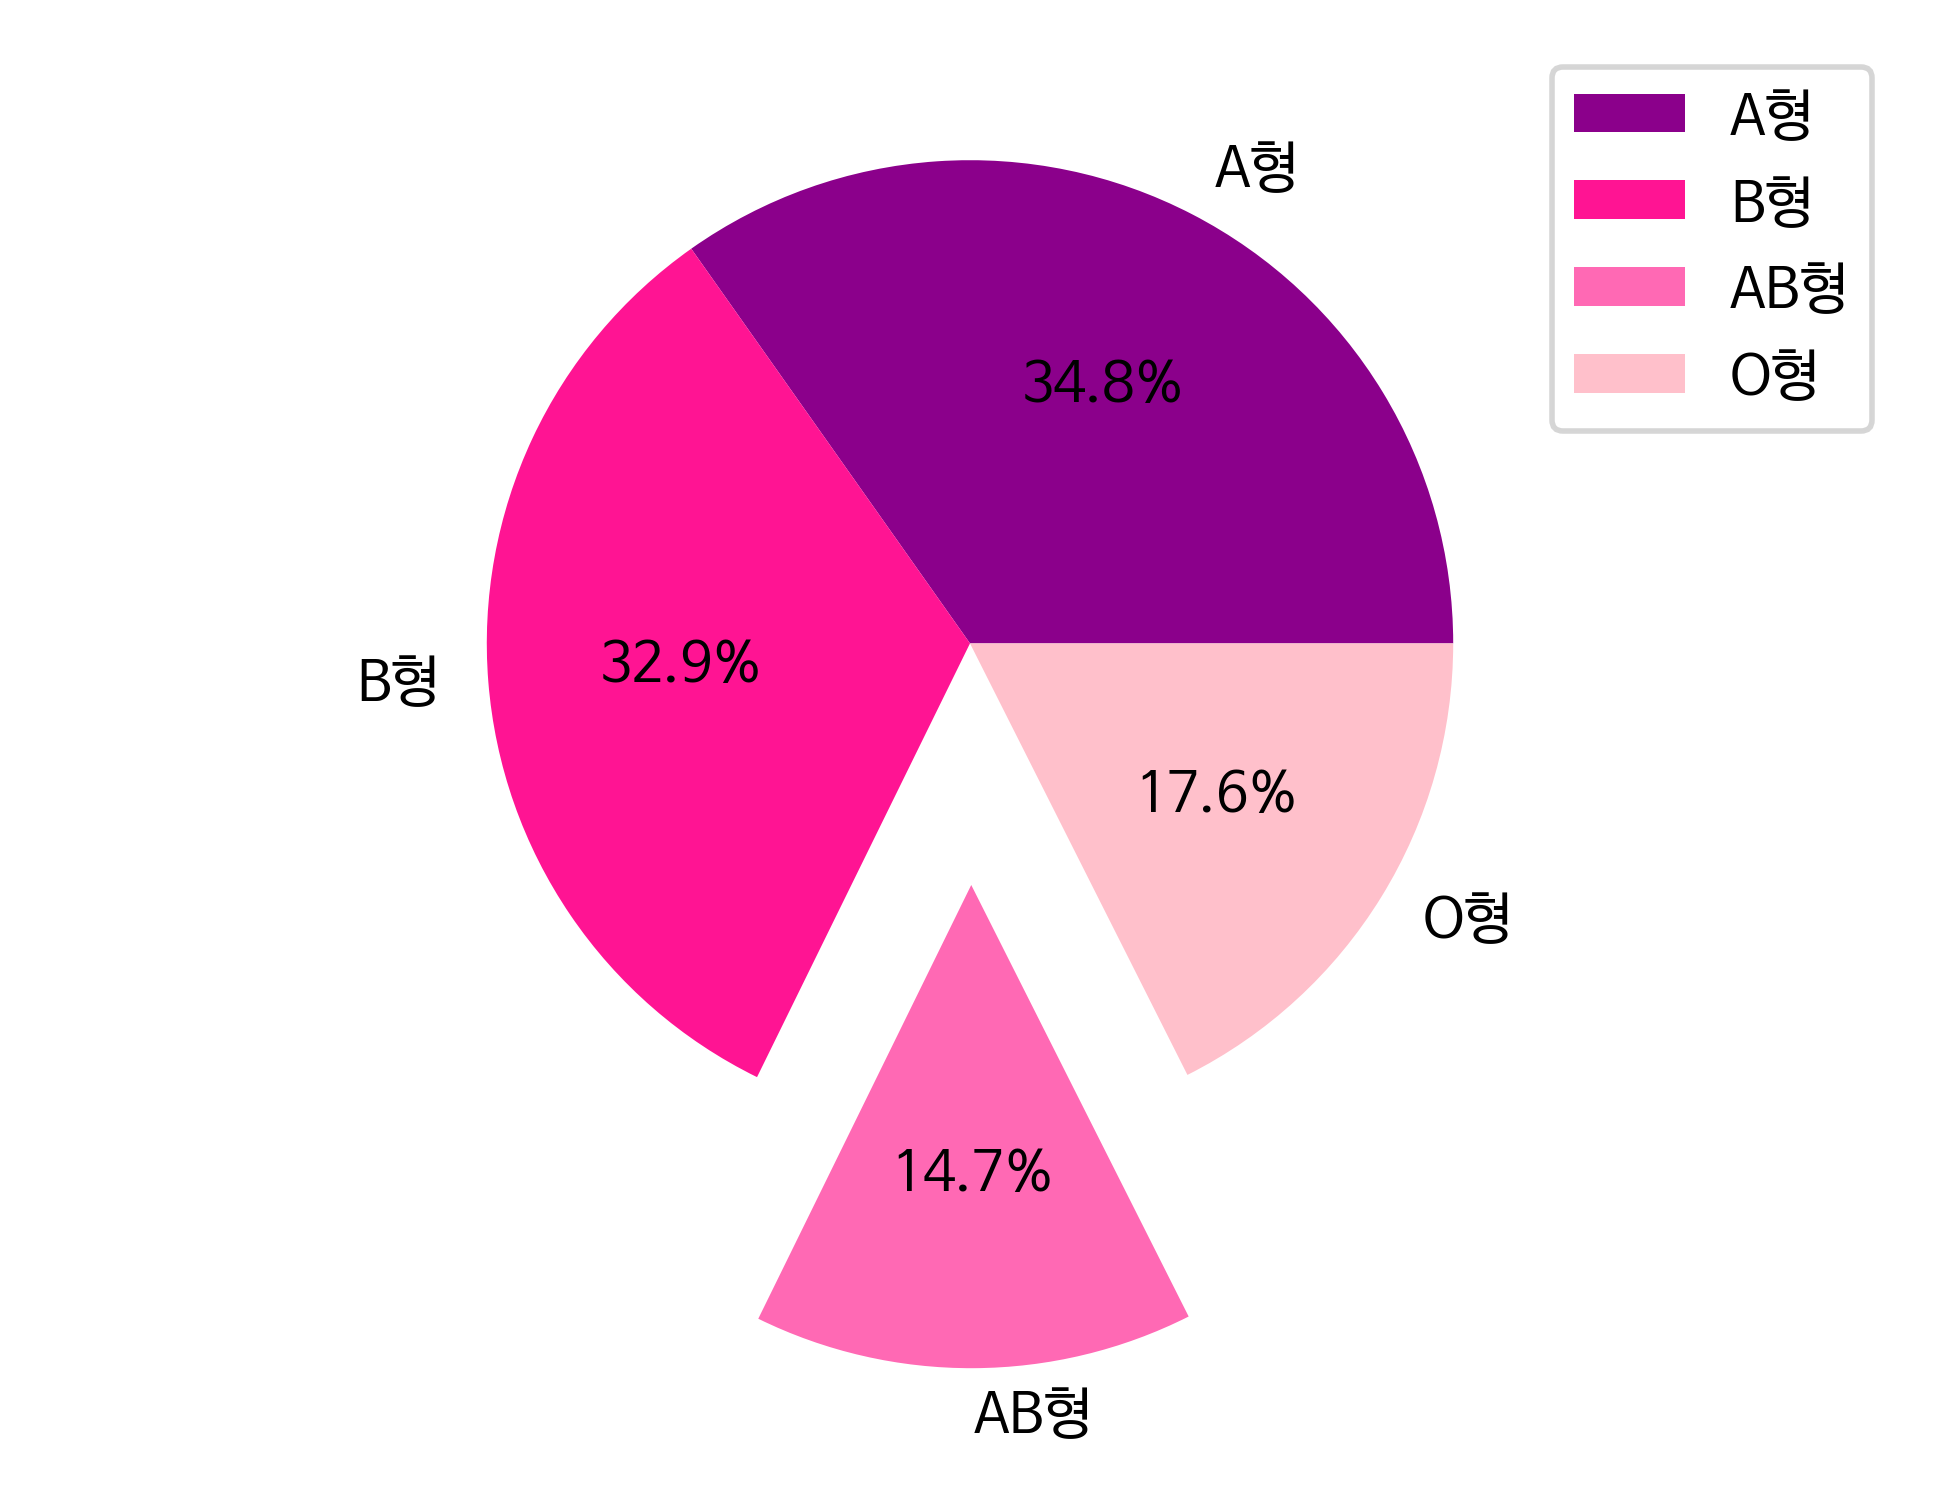

In [ ]:
# 파이안에서 특정 부분 강조할 때

import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1031,1233]
label = ['A형','B형','AB형','O형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']  # 표현하는 데이터가 여러가지이기 때문에 리스트형으로 만듬

plt.axis('equal')   # label 안 겹치게하는 메소드
plt.pie(size,labels=label,autopct='%.1f%%',explode=(0,0,0.5,0),colors=color) # 파이안에 특정 부분 따로 떼어냄
plt.legend()
plt.show()

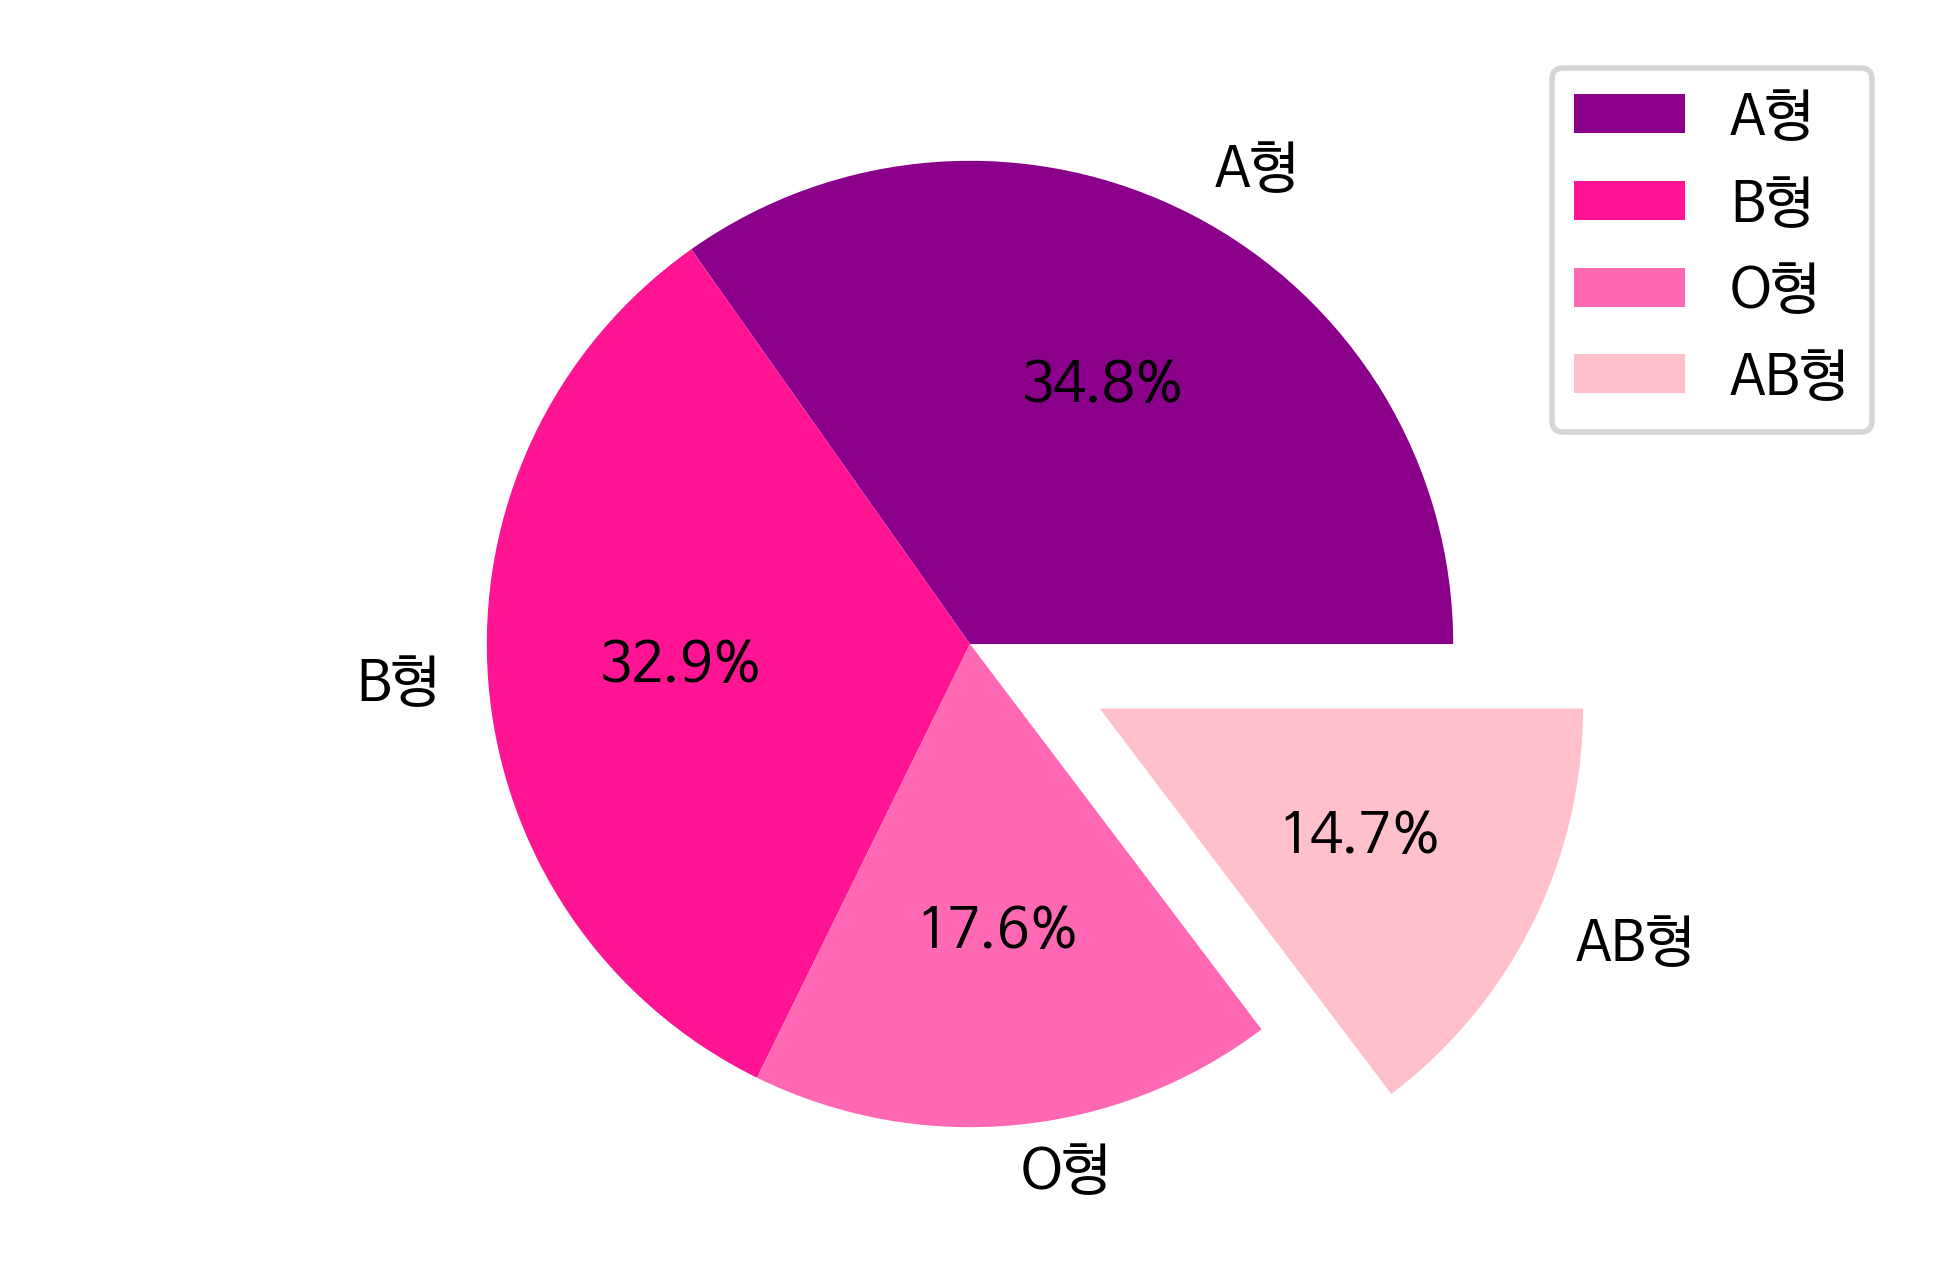

In [ ]:
import matplotlib.pyplot as plt

plt.figure(dpi=200)

size = [2441,2312,1233,1031]
label = ['A형','B형','O형','AB형']
color = ['darkmagenta', 'deeppink', 'hotpink', 'pink']  # 표현하는 데이터가 여러가지이기 때문에 리스트형으로 만듬

plt.axis('equal')   # label 안 겹치게하는 메소드
plt.pie(size,labels=label,autopct='%.1f%%',explode=(0,0,0,0.3),colors=color) # 파이안에 특정 부분 따로 떼어냄
plt.legend()
plt.show()

제주도의 성별 인구 비율 표현하기

찾고 싶은 지역의 이름을 알려주세요부산


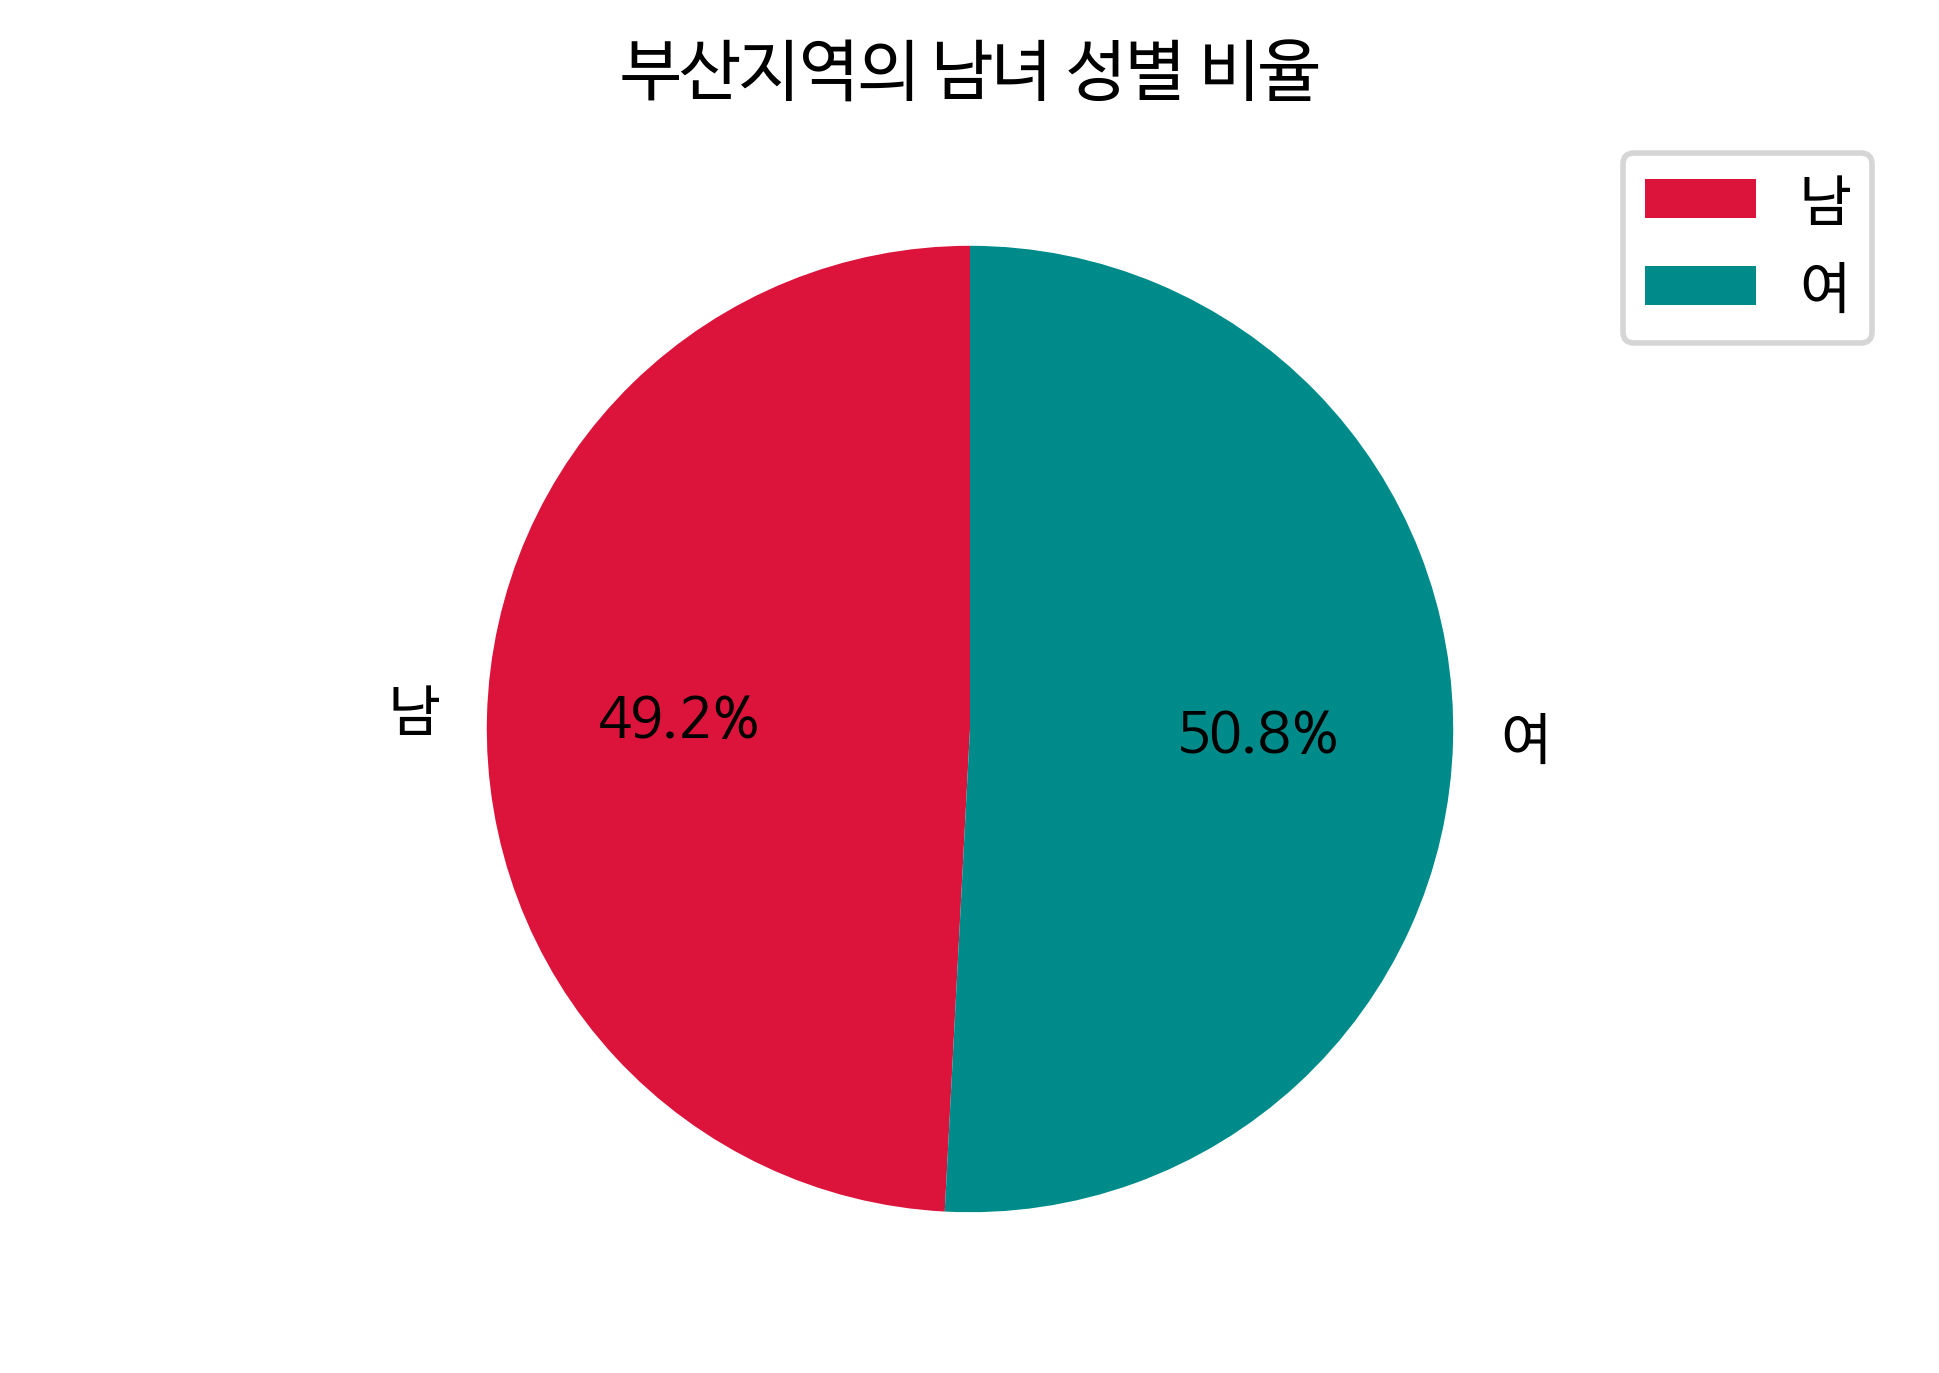

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv',encoding='cp949')
data = csv.reader(f)

size = [] # 제주도의 남성 인구 합계, 여성 인구 합계

name = input('찾고 싶은 지역의 이름을 알려주세요')

for row in data:
  if name in row[0]:
    m = 0 # 남성 인구수 합계 변수
    f = 0 # 여성 인구수 합계 변수
    for i in range(101):
      m += int(row[3+i].replace(',',''))
      f += int(row[106+i].replace(',',''))
    break

size.append(m)
size.append(f)

# 파이차트 시각화
plt.figure(dpi=200)
color = ['crimson', 'darkcyan']
label = ['남','여']
plt.axis('equal')   
plt.pie(size,labels=label,autopct='%.1f%%',colors=color,startangle=90) # startangle = 90도로 시작
plt.title(name+'지역의 남녀 성별 비율')
plt.legend()
plt.show()


찾고 싶은 지역의 이름을 알려주세요세종


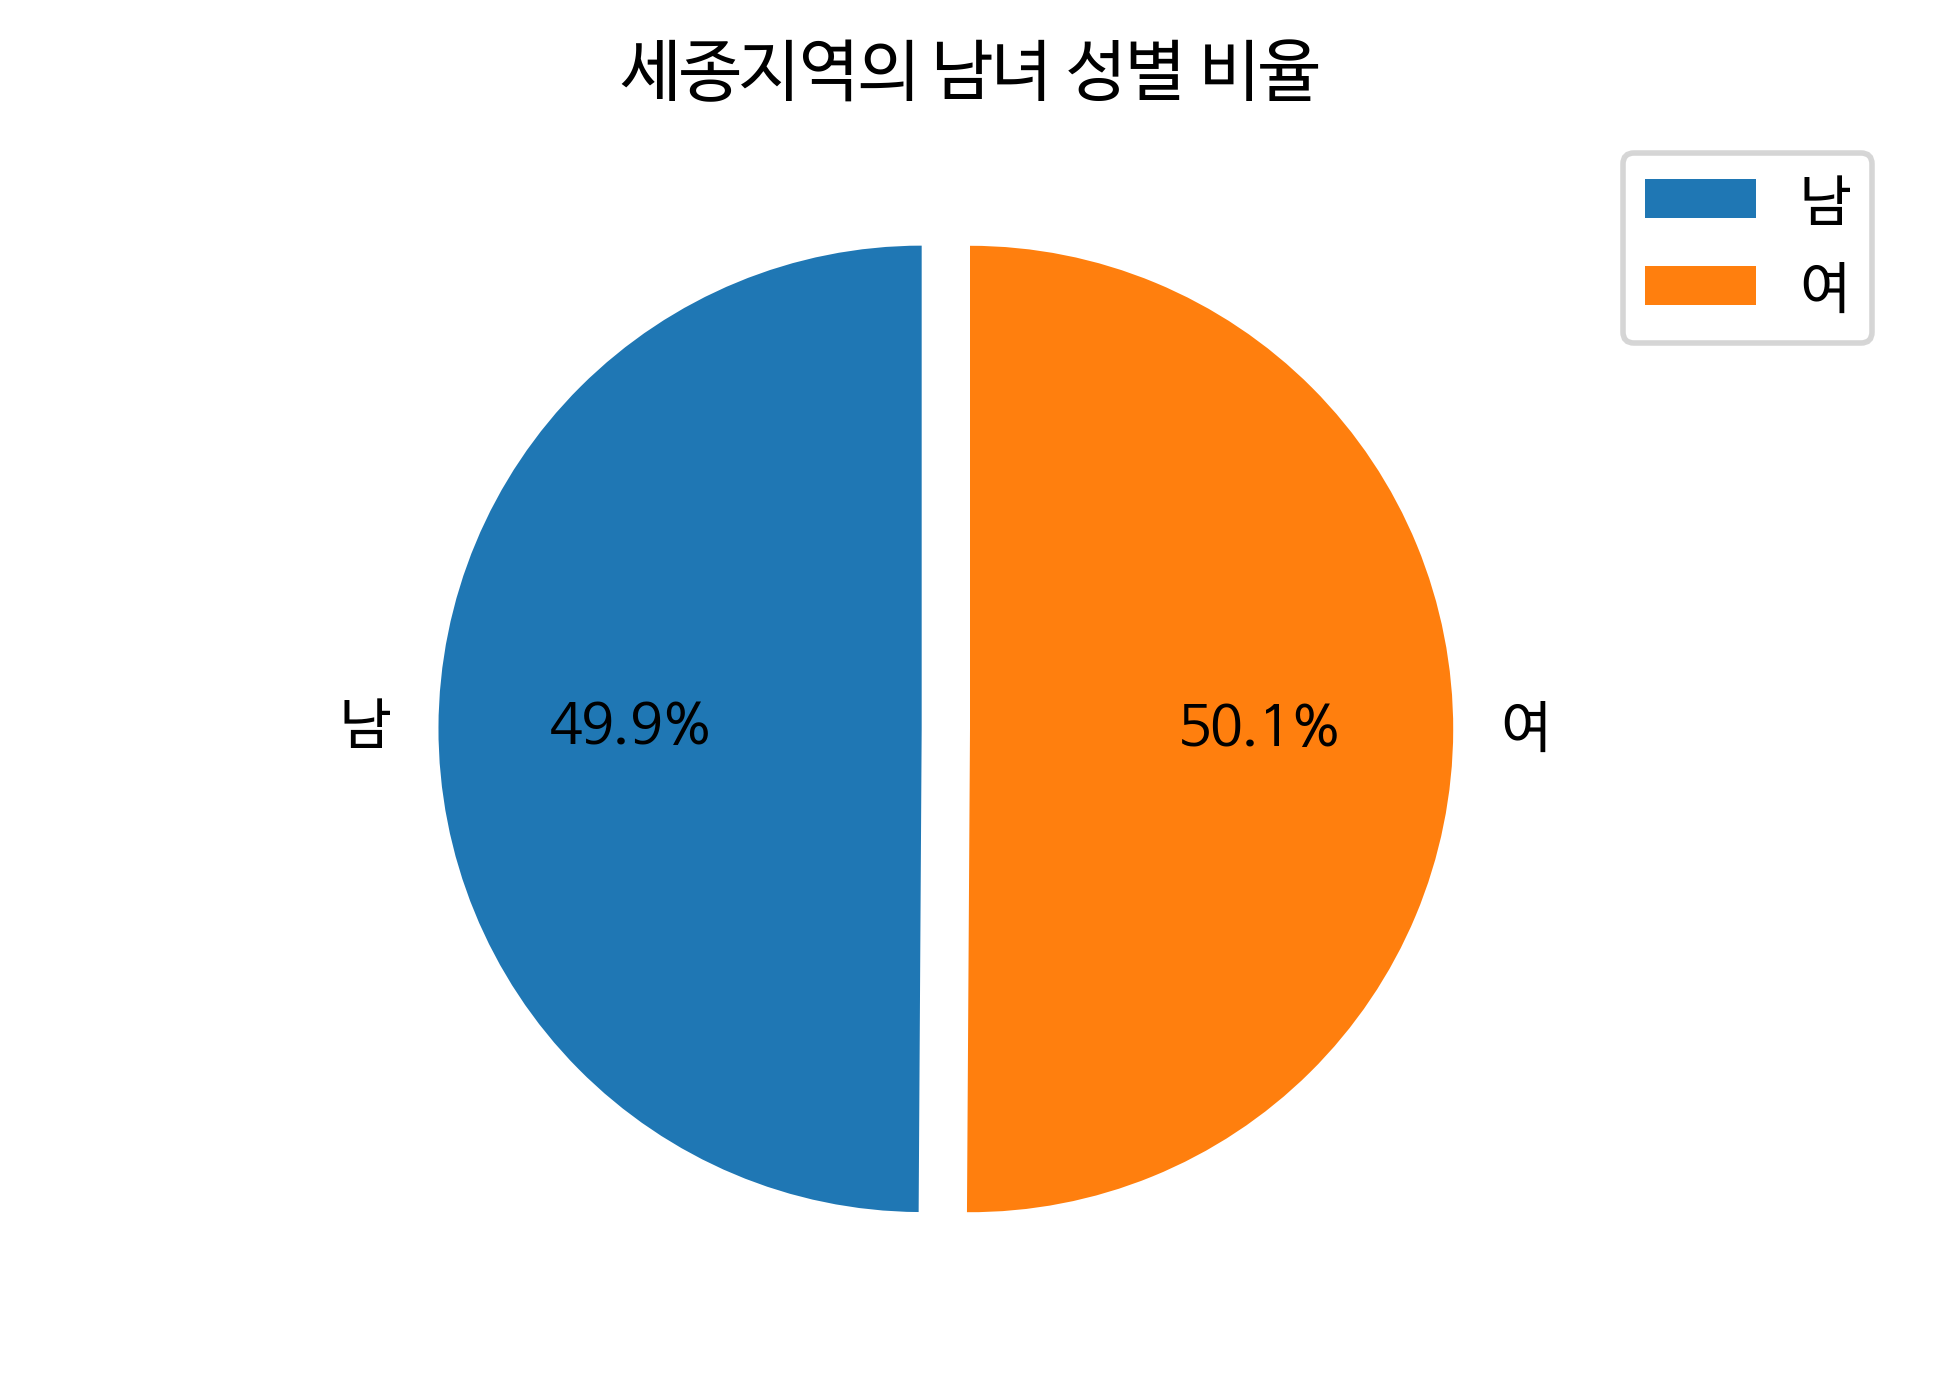

In [ ]:
import csv
import matplotlib.pyplot as plt

f = open('gender.csv',encoding='cp949')
data = csv.reader(f)

size = [] # 제주도의 남성 인구 합계, 여성 인구 합계

name = input('찾고 싶은 지역의 이름을 알려주세요')

for row in data:
  if name in row[0]:
    m = 0 # 남성 인구수 합계 변수
    f = 0 # 여성 인구수 합계 변수
    for i in range(101):
      m += int(row[3+i].replace(',',''))
      f += int(row[106+i].replace(',',''))
    break

size.append(m)
size.append(f)

# 파이차트 시각화
plt.figure(dpi=200)
color = ['crimson', 'darkcyan']
label = ['남','여']
plt.axis('equal')   
plt.pie(size,labels=label,autopct='%.1f%%',explode=(0.1,0),startangle=90) # startangle = 90도로 시작
plt.title(name+'지역의 남녀 성별 비율')
plt.legend()
plt.show()
